## Data Preprocessing Tools

### 1. Import Libraries

In [247]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

### 2. Import Dataset

In [248]:
dataset = pd.read_csv(r'C:\Users\Admin\Datasets\Data.csv')

In [249]:
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [250]:
dataset.shape

(10, 4)

In [251]:
# here we have three features (Country, age, and Salary) and One label(Purhase)
# With the help of three feauture, we will predict whether he will purchase the product or not


In [252]:
# Now we divide the dataset into two

# 1. First we separate the feature with x 
# 2. Second we separate the label as y

In [253]:
X = dataset.iloc[:,0:3]             # iloc stands for Index Location,  first : is row and after it column

In [254]:
X

,Country,Age,Salary
0,France,44.0,72000.0
1,Spain,27.0,48000.0
2,Germany,30.0,54000.0
3,Spain,38.0,61000.0
4,Germany,40.0,NaN
5,France,35.0,58000.0
6,Spain,NaN,52000.0
7,France,48.0,79000.0
8,Germany,50.0,83000.0
9,France,37.0,67000.0


In [255]:
type(X)

pandas.core.frame.DataFrame

In [256]:
# The work we are doing in Machine learning model will be through numpy array, 
# we will input this into machine learning model or algorithm
# So below we will convert it into array by adding (.values) in it

In [257]:
X = dataset.iloc[:, 0:3].values
y = dataset.iloc[:, 3].values

In [258]:
type(X)
type(y)

numpy.ndarray

In [259]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [260]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

### 3. Taking care of missing data

In [261]:
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [262]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, nan],
       ['France', 35.0, 58000.0],
       ['Spain', nan, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

In [263]:
# to fill these empty(NaN) values, we use some techniques
# Where ever we have any empty(NaN) values we will use median of that column 
# Here we will use Mean of Age and Salary in there respective columns for Empty/Missing/NaN values
# if data is more complex we can use Mea, Median, Mode and SD also as per the data 
# Following method will be applying for numeric data, we need to keep check

In [264]:
from sklearn.impute import SimpleImputer

In [265]:
#Next step is to create object using imputer class
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
z = imputer.transform(X[: , 1:3])

In [266]:
z

array([[4.40000000e+01, 7.20000000e+04],
       [2.70000000e+01, 4.80000000e+04],
       [3.00000000e+01, 5.40000000e+04],
       [3.80000000e+01, 6.10000000e+04],
       [4.00000000e+01, 6.37777778e+04],
       [3.50000000e+01, 5.80000000e+04],
       [3.87777778e+01, 5.20000000e+04],
       [4.80000000e+01, 7.90000000e+04],
       [5.00000000e+01, 8.30000000e+04],
       [3.70000000e+01, 6.70000000e+04]])

In [267]:
# We have to change the X feauture matrics so we can do following steps instead of z step above

In [268]:
X[: , 1:3] = imputer.transform(X[: , 1:3])

In [269]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

### 4. Encoding Categorical Data
#### 1. Independent Variable

In [270]:
#  One Hot Encoding
#  One Hot Encoding is a method for converting categorical variables into a binary format. 
#  It creates new columns for each category where 1 means the category is present and 0 means it is not. 
#  The primary purpose of One Hot Encoding is to 
#  ensure that categorical data can be effectively used in machine learning models.

In [271]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])], remainder='passthrough')

X = ct.fit_transform(X)

In [272]:
X

array([[1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [0.0, 1.0, 0.0, 30.0, 54000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 35.0, 58000.0],
       [0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

### 4. Encoding Categorical Data
#### 2. Dependent Variable

In [273]:
y

array(['No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes'],
      dtype=object)

In [274]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y = le.fit_transform(y)


In [275]:
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [276]:
# difference between OneHotEncoder and LabelEncode

# OneHotEncoder is apply where ORDER does not matter, For example: ORDER does not matter in Country column above
# LabelEncoder is apply where ORDER is matter

### 5. Spilitting the Dataset

In [277]:
# Splitting the Dataset means you divide your dataset into two main parts

#  Training Set --> which is used to train model
#  Testing Set  --> is not reveal to the machine model, Later use for testing and finding the accuracy

In [278]:
from sklearn.model_selection import train_test_split

# train_test_split(feauture, label, Split or test size, random state is 1
# because whenever we perfrom train and test, we will have same results.
#Good approach is test size 30% and train size 70%
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=1)


In [279]:
X_train

array([[0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 35.0, 58000.0]], dtype=object)

In [280]:
X_test

array([[0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [281]:
y_train

array([0, 1, 0, 0, 1, 1, 0, 1])

In [282]:
y_test

array([0, 1])

### 6. Feature Scaling

In [283]:
X_train

array([[0.0, 0.0, 1.0, 38.77777777777778, 52000.0],
       [0.0, 1.0, 0.0, 40.0, 63777.77777777778],
       [1.0, 0.0, 0.0, 44.0, 72000.0],
       [0.0, 0.0, 1.0, 38.0, 61000.0],
       [0.0, 0.0, 1.0, 27.0, 48000.0],
       [1.0, 0.0, 0.0, 48.0, 79000.0],
       [0.0, 1.0, 0.0, 50.0, 83000.0],
       [1.0, 0.0, 0.0, 35.0, 58000.0]], dtype=object)

In [284]:
# We will apply feauture training here because our Age and Salary columns range are not standard,
# Forexample for Age column, its start from 1 and end at 100
# While for Salary column it start from 1000 and end at 100000
# There are scaling are not inline with eachother

In [285]:
# To Scale the Feauture we use Two basic Techniques
# 1. Standardisation (Z-score Normalization) 
#        In Standard, range is set betwwen -3 to 3
#        This Technique is used everywhere
# 2. Max-Min Normalization
#        Normalize Technique are used when Features are normalized

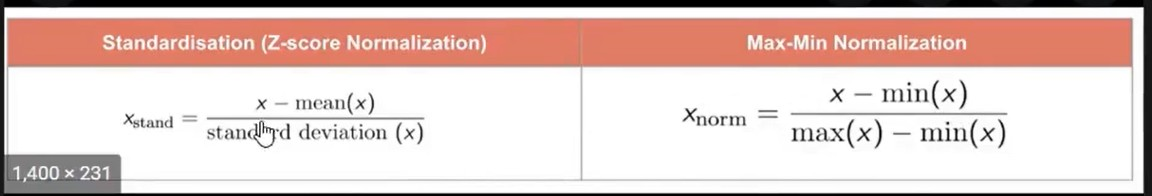

In [286]:
# We are using Standardisation

In [287]:
# Need to apply Feauture Scaling on Training rather than Testing
# In Testing, only Transform are apply

In [288]:
from sklearn.preprocessing import StandardScaler

In [289]:
sc = StandardScaler()

In [290]:
X_train[: , 3:] = sc.fit_transform(X_train[: , 3:])   
# fir_transform is the calculation of mean and Standard Deviation

In [291]:
X_train

array([[0.0, 0.0, 1.0, -0.19159184384578545, -1.0781259408412425],
       [0.0, 1.0, 0.0, -0.014117293757057777, -0.07013167641635372],
       [1.0, 0.0, 0.0, 0.566708506533324, 0.633562432710455],
       [0.0, 0.0, 1.0, -0.30453019390224867, -0.30786617274297867],
       [0.0, 0.0, 1.0, -1.9018011447007988, -1.420463615551582],
       [1.0, 0.0, 0.0, 1.1475343068237058, 1.232653363453549],
       [0.0, 1.0, 0.0, 1.4379472069688968, 1.5749910381638885],
       [1.0, 0.0, 0.0, -0.7401495441200351, -0.5646194287757332]],
      dtype=object)

In [292]:
# Now Age and Salary columns both are in same scale, its feature scaling is complete

In [293]:
X_test

array([[0.0, 1.0, 0.0, 30.0, 54000.0],
       [1.0, 0.0, 0.0, 37.0, 67000.0]], dtype=object)

In [294]:
X_test[: , 3:] = sc.transform(X_test[: , 3:])

In [295]:
X_test

array([[0.0, 1.0, 0.0, -1.4661817944830124, -0.9069571034860727],
       [1.0, 0.0, 0.0, -0.44973664397484414, 0.2056403393225306]],
      dtype=object)

In [296]:
# We will not use Feauture Scaling everywhere,
# We will use it according to Algorithm